In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df = pd.read_csv("../data/final.csv")
df.drop(["Unnamed: 0", 'birth year', 'date', 'starttime', 'stoptime'], inplace=True, axis=1)
df.head()

,tripduration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,gender,month,day,hour,dayofweek,Isweekday,age
0,447,3734,E 58 St & 1 Ave (NW Corner),40.759125,-73.962658,3156,E 72 St & York Ave,40.766638,-73.953483,38451,Subscriber,1,11,3,13,7,0,34
1,1748,483,E 12 St & 3 Ave,40.732233,-73.988900,460,S 4 St & Wythe Ave,40.712859,-73.965903,31065,Subscriber,1,5,30,11,4,1,56
2,684,426,West St & Chambers St,40.717548,-74.013221,368,Carmine St & 6 Ave,40.730386,-74.002150,17112,Customer,2,8,6,18,2,1,33
3,561,267,Broadway & W 36 St,40.750977,-73.987654,359,E 47 St & Park Ave,40.755103,-73.974987,35233,Subscriber,1,9,27,8,5,1,39
4,1726,525,W 34 St & 11 Ave,40.755942,-74.002116,337,Old Slip & Front St,40.703799,-74.008387,25424,Subscriber,1,9,9,16,1,1,43


# User Type Distriubution

In [3]:
user = df.groupby('usertype')['gender'].count()
user

usertype
Customer      143842
Subscriber    883734
Name: gender, dtype: int64

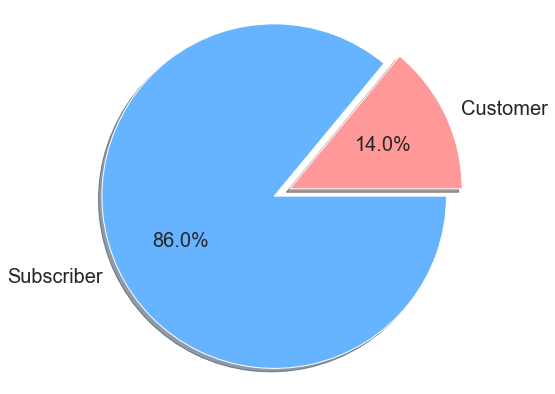

In [31]:
# pie chart of work
user = df.groupby('usertype')['gender'].count()
labels = ['Customer', 'Subscriber']
fig1, ax1 = plt.subplots(figsize=(7,7))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
textprops = {"fontsize":20}
ax1.pie(user, labels=labels, colors=colors, explode=(0.1, 0), textprops=textprops, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

# Gender Distribution by User Type

In [5]:
user_gender_count = df.groupby(['usertype', 'gender'])['tripduration'].sum().reset_index()
user_gender_count

,usertype,gender,tripduration
0,Customer,0,156513985
1,Customer,1,98697325
2,Customer,2,51436025
3,Subscriber,0,13743435
4,Subscriber,1,503774287
5,Subscriber,2,194100074


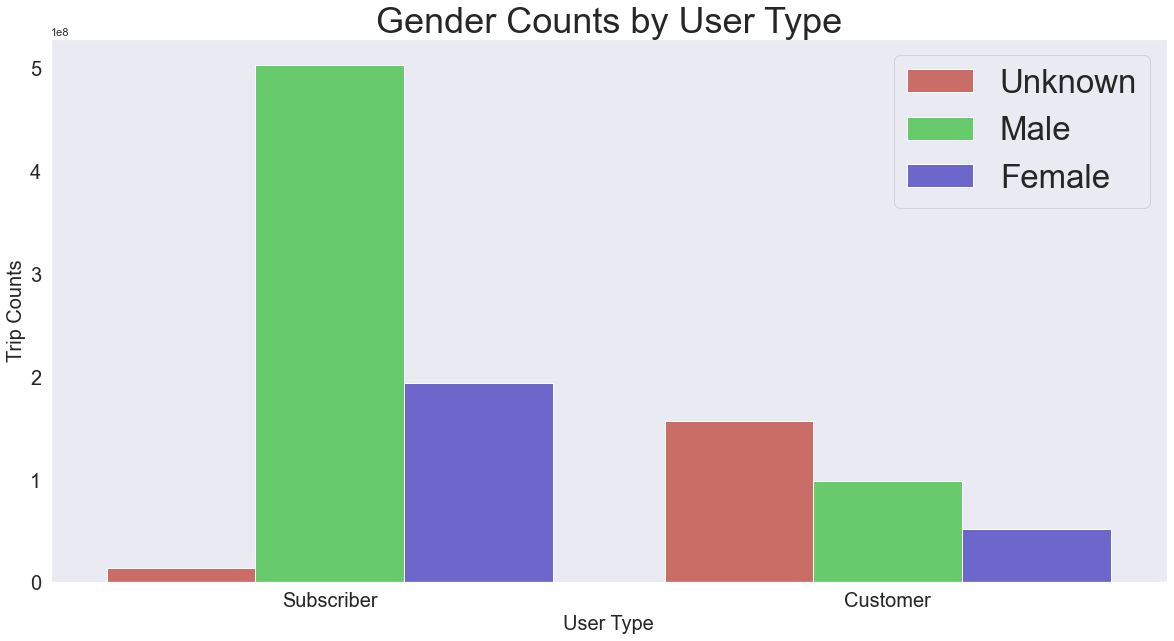

In [6]:
sns.set_theme(style="dark")
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=3)
plt.title("Gender Counts by User Type")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.barplot(x = 'usertype', y = 'tripduration', hue = 'gender', order = ['Subscriber', 'Customer'], data = user_gender_count, palette = 'hls')
ax.set(xlabel = "User Type", ylabel = "Trip Counts")
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Unknown', "Male", "Female"])
ax.xaxis.get_label().set_size(20)
ax.yaxis.get_label().set_size(20)
plt.show()

# Age Distribution by User Type

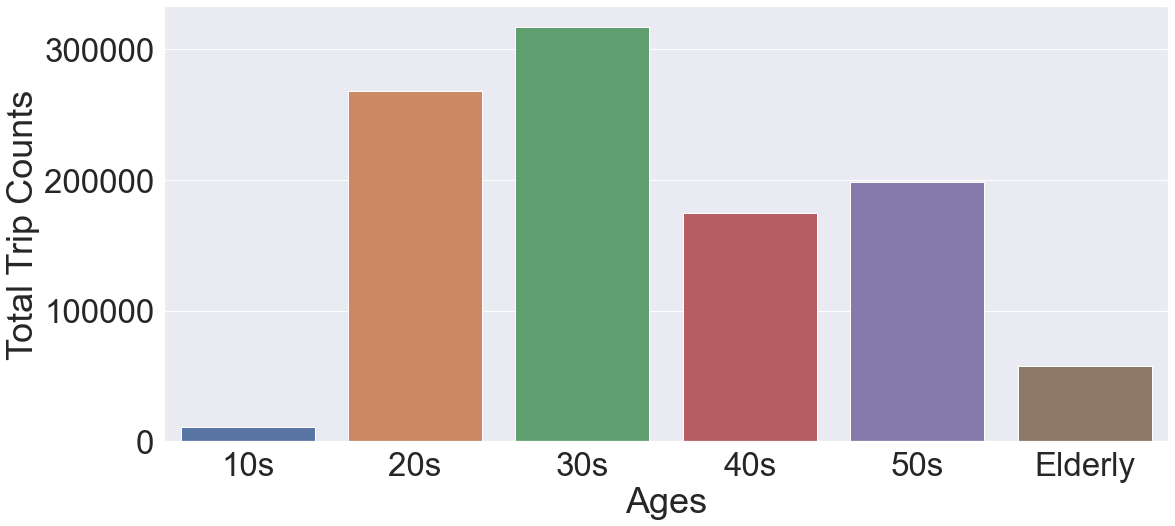

In [7]:
df["ages"] = pd.cut(df.age, bins=[10, 20, 30, 40, 50, 60, 200], labels = ["10s", "20s", "30s", "40s", "50s", "Elderly"])
age_trip = df.groupby('ages').count()[['tripduration']].reset_index()
age_trip.columns=['Ages','Total Trip Counts']
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.barplot('Ages', 'Total Trip Counts',data = age_trip);

# Trip Duration by User Type

In [8]:
user_trip = df.groupby('usertype').mean()[['tripduration']].reset_index()
user_trip

,usertype,tripduration
0,Customer,2131.834478
1,Subscriber,805.239807


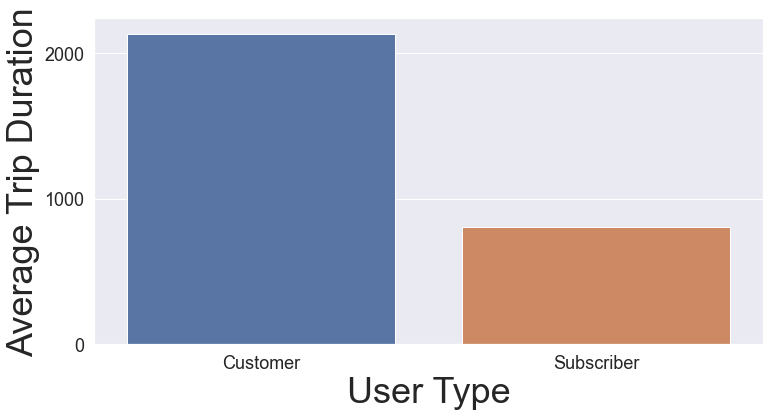

In [9]:
user_trip.columns=['User Type','Average Trip Duration']
plt.figure(figsize=(12,6))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
sns.set_style('darkgrid')
sns.barplot('User Type','Average Trip Duration', data = user_trip);

# Most Popular Start Stations by User Type

In [15]:
user_stations = df.groupby(['usertype', 'start_station_name']).sum()['tripduration'].reset_index()
user_stations

,usertype,start_station_name,tripduration
0,Customer,1 Ave & E 110 St,86114
1,Customer,1 Ave & E 16 St,338877
2,Customer,1 Ave & E 18 St,320556
3,Customer,1 Ave & E 30 St,190340
4,Customer,1 Ave & E 44 St,438384
...,...,...,...
1824,Subscriber,Wyckoff St & 3 Ave,312590
1825,Subscriber,Wyckoff St & Bond St,94671
1826,Subscriber,Wyckoff St & Nevins St,270
1827,Subscriber,Wythe Ave & Metropolitan Ave,1259083


## Most Popular Start Stations by Customer

In [23]:
user_stations_cust = user_stations[user_stations['usertype'] == "Customer"].drop('usertype', axis=1)
user_stations_cust = user_stations_cust.sort_values(by='tripduration', ascending=False)[1:11]
user_stations_cust

,start_station_name,tripduration
249,Central Park S & 6 Ave,4158342
114,5 Ave & E 88 St,3808395
494,Grand Army Plaza & Central Park S,3669916
462,Franklin Ave & Empire Blvd,3304759
569,Lenox Ave & W 111 St,3057131
206,Broadway & W 51 St,2944377
573,Lenox Ave & W 130 St,2813263
258,Centre St & Chambers St,2798142
22,12 Ave & W 40 St,2757323
598,Macon St & Nostrand Ave,2612291


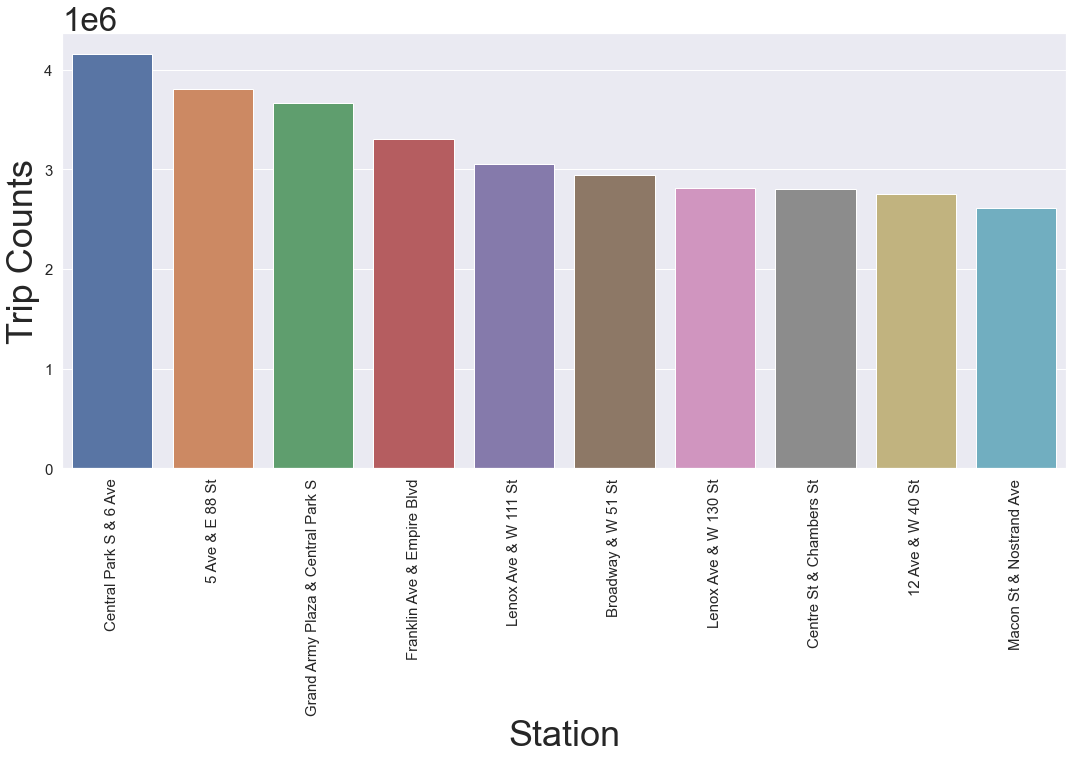

In [29]:
user_stations_cust.columns=['Station','Trip Counts']
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.set_style('darkgrid')
ax = sns.barplot('Station', 'Trip Counts',data = user_stations_cust);